<a href="https://colab.research.google.com/github/luisaespinoza/CSCI164_PhotoCaptioning/blob/main/Copy_of_Transformers_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings(action = 'ignore')

In [ ]:
from transformers import pipeline
from transformers.utils import logging
logging.set_verbosity(40)

In [ ]:
from IPython.display import Image

In [29]:
import requests

In [50]:
import imageio

def convert_heic_to_jpg(heicFile, jpgFile):
    image = imageio.imread(heicFile)
    imageio.imwrite(jpgFile, image, format="JPEG")

In [62]:
from PIL import Image
import pyheif

def convert_heic_to_jpg2(heic_file, jpg_file):
    heif_file = pyheif.read_heif(heic_file)
    image = Image.frombytes(
        mode=heif_file.mode,
        size=heif_file.size,
        data=heif_file.data
    )
    image.save(jpg_file, "JPEG")

In [31]:
def fetchImage(imageUrl, imageName):
  # URL of the image
  url = imageUrl

  # Send a GET request to the URL
  response = requests.get(url)

  # Check if the request was successful
  if response.status_code == 200:
      # Open a file in binary write mode
      with open(imageName + ".jpg", "wb") as f:
          # Write the content of the response to the file
          f.write(response.content)
      print("Image downloaded successfully.")
  else:
      print("Failed to download image.")

In [33]:
# file 1
# https://media-cldnry.s-nbcnews.com/image/upload/t_fit-1500w,f_auto,q_auto:best/rockcms/2022-12/221219-messi-mb-0956-95ce9d.jpg
imageUrl = "https://media-cldnry.s-nbcnews.com/image/upload/t_fit-1500w,f_auto,q_auto:best/rockcms/2022-12/221219-messi-mb-0956-95ce9d.jpg"
imageName = "messi"
fetchImage(imageUrl,imageName)
file_name1 = "messi.jpg"

Image downloaded successfully.


In [55]:
# file 2
# https://drive.google.com/file/d/1wpnX2zNvym3Q1Hvd4LYmKrqttJfirEol/view?usp=drive_link
from PIL import Image
import pyheif
!gdown 1wpnX2zNvym3Q1Hvd4LYmKrqttJfirEol
tempFile = "IMG_1773.HEIC"
outputFile = "sandrock.jpg"
convert_heic_to_jpg2(tempFile,outputFile)
file_name2 = outputFile

Downloading...
From: https://drive.google.com/uc?id=1wpnX2zNvym3Q1Hvd4LYmKrqttJfirEol
To: /content/IMG_1773.HEIC
100% 3.87M/3.87M [00:00<00:00, 69.8MB/s]


In [66]:
# file 3
# https://drive.google.com/file/d/1I7hfNd4KPcpssTk7KDDBeH38U0wj2nUc/view?usp=drive_link
from PIL import Image
import pyheif
!gdown 1I7hfNd4KPcpssTk7KDDBeH38U0wj2nUc
tempFile = "IMG_0559.HEIC"
outputFile = "pokemon.jpg"
convert_heic_to_jpg2(tempFile,outputFile)
file_name3 = outputFile

Downloading...
From: https://drive.google.com/uc?id=1I7hfNd4KPcpssTk7KDDBeH38U0wj2nUc
To: /content/IMG_0559.HEIC
100% 1.65M/1.65M [00:00<00:00, 98.8MB/s]


In [ ]:
### Task: Image captioning
captioner = pipeline(task="image-to-text",
                     model="nlpconnect/vit-gpt2-image-captioning")

In [37]:
file_name = file_name1

In [ ]:
captioner2 = pipeline("image-to-text", model="Salesforce/blip-image-captioning-base")

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

In [75]:
captioner3 = pipeline("image-to-text", model="Salesforce/blip-image-captioning-base")

In [40]:
captioner(file_name)

[{'generated_text': 'a man holding a soccer ball in his hand '}]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

[{'generated_text': 'a man riding a skateboard on top of a display of art '}]


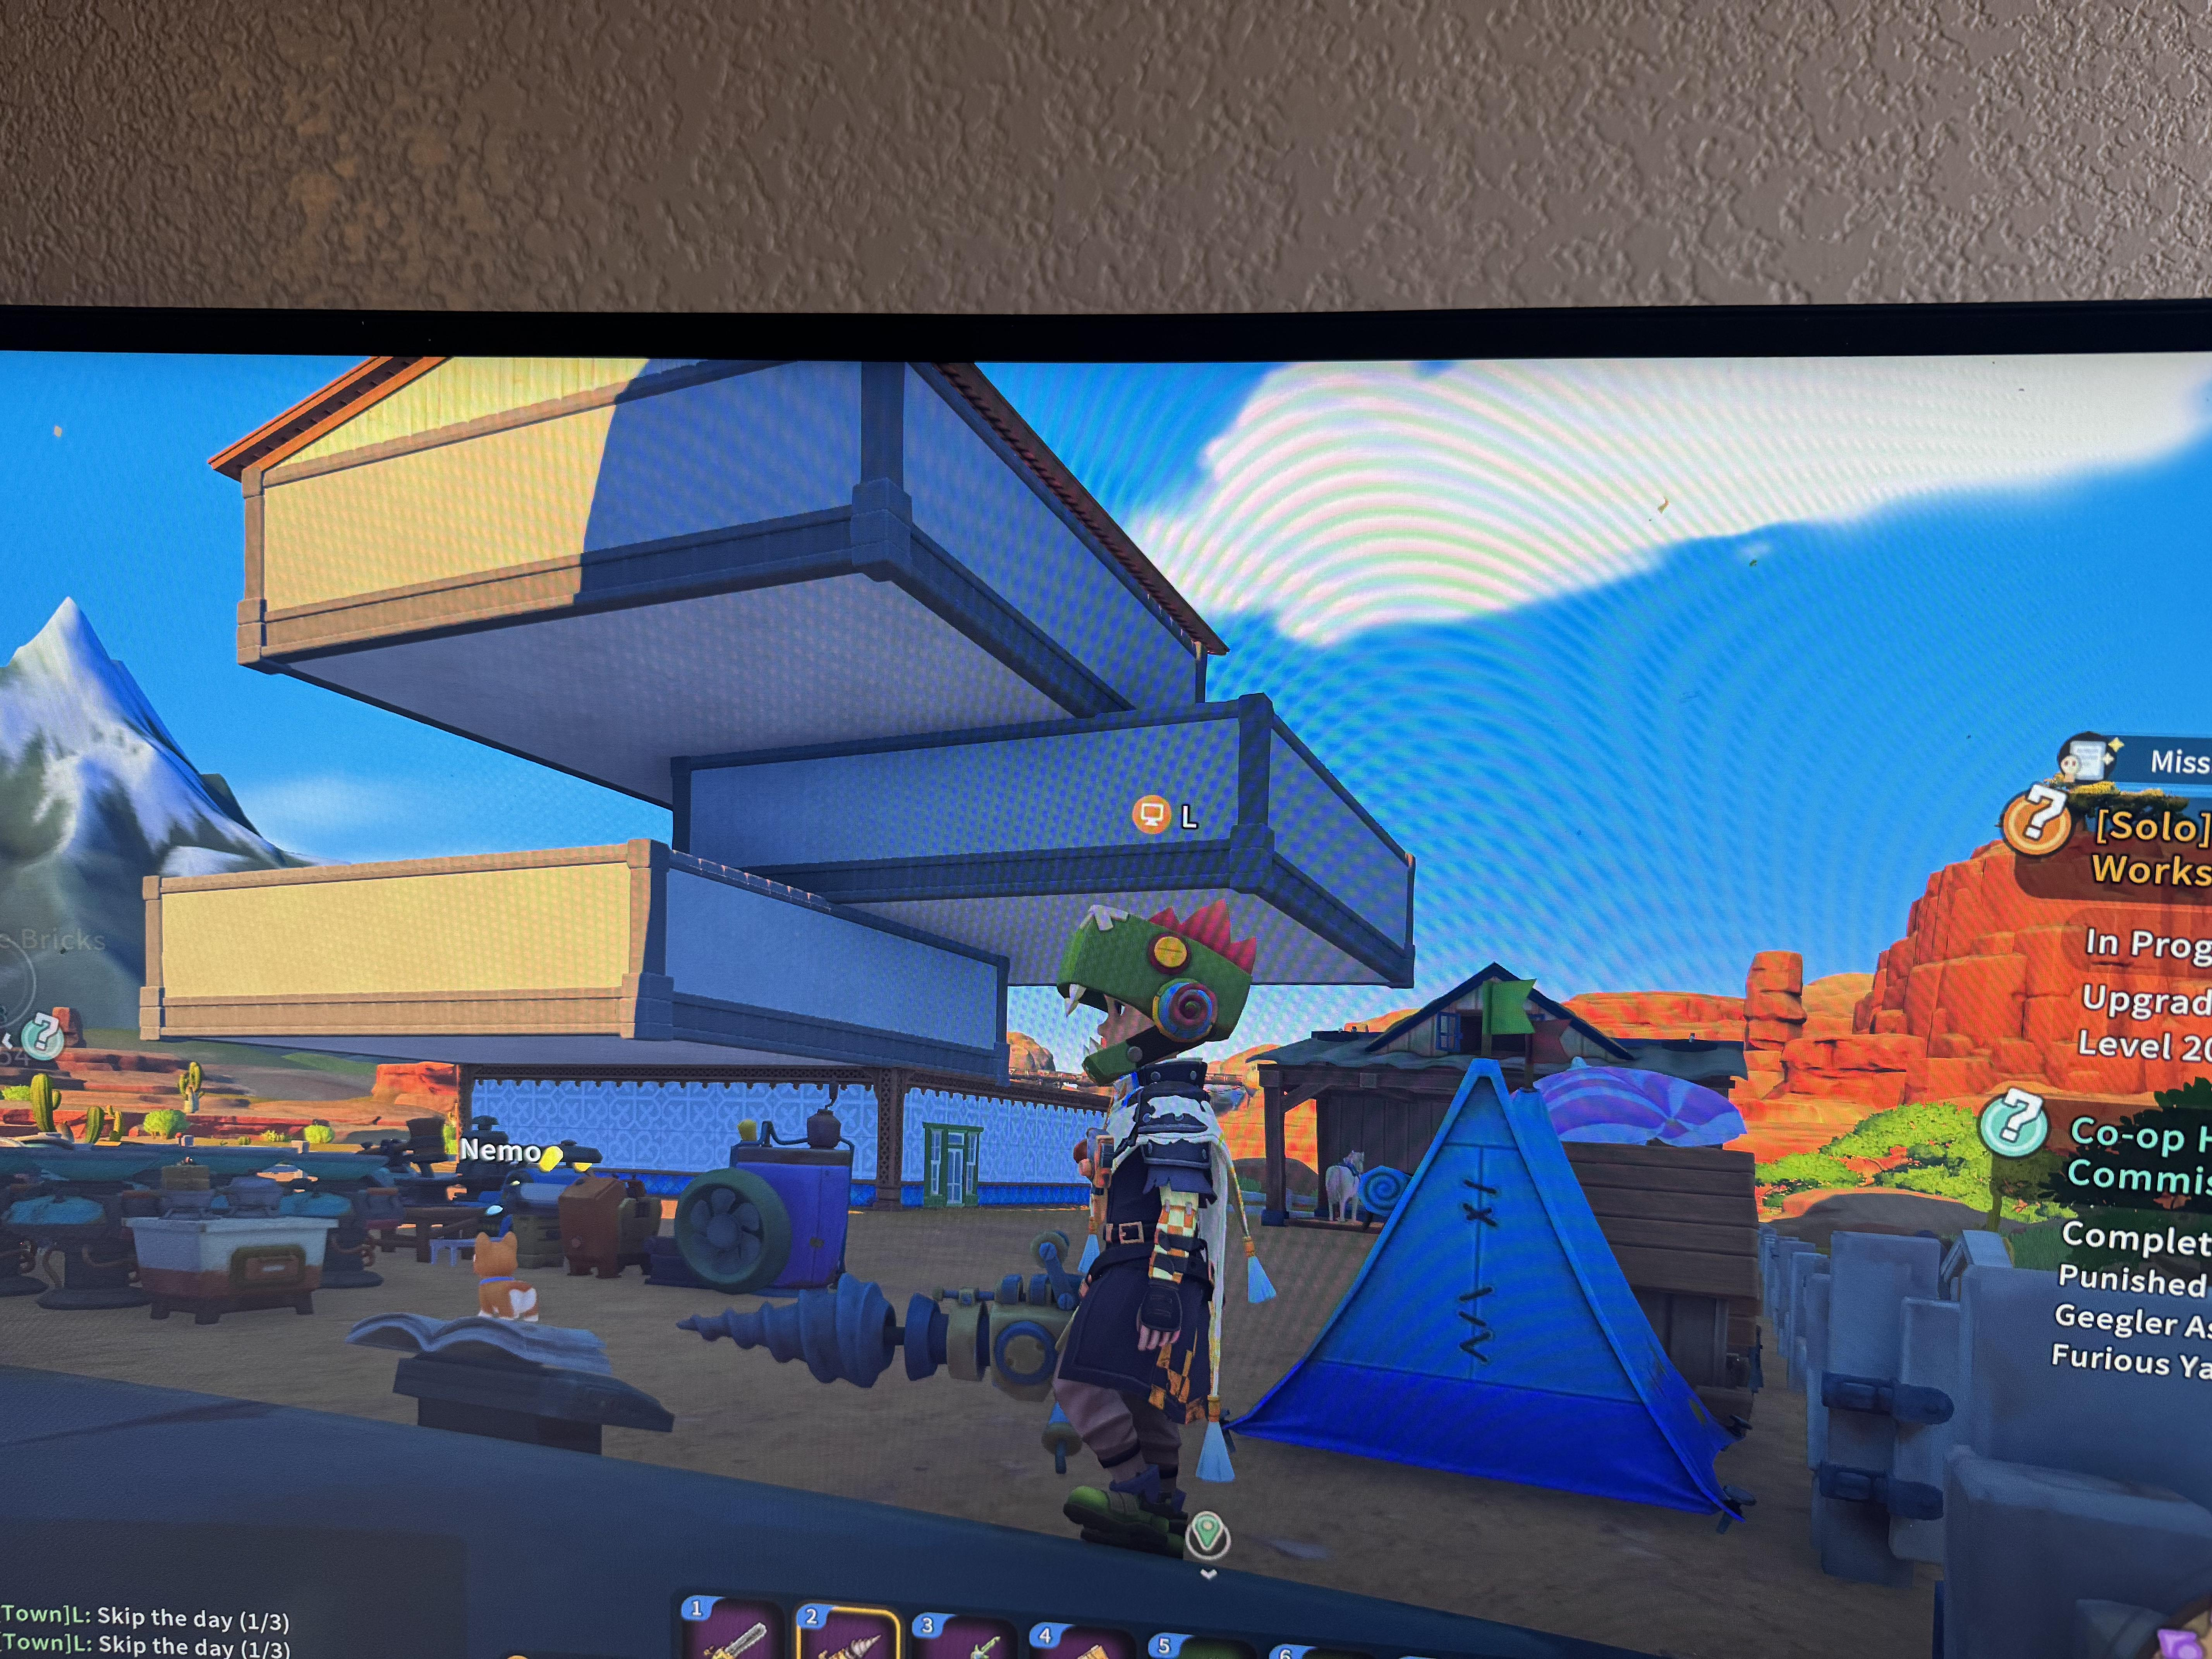

In [59]:
from IPython.display import Image
print(captioner(file_name2))
filename=file_name2
display(Image(filename))

In [28]:
captioner2(file_name)

[{'generated_text': "argentina ' s lionel torres celebrates with the world cup after winning the world cup in the final match against"}]

In [76]:
captioner3(file_name3)

[{'generated_text': 'a stuffed animal sitting on the dashboard of a car'}]

# Photo 1

[{'generated_text': "argentina ' s lionel torres celebrates with the world cup after winning the world cup in the final match against"}]


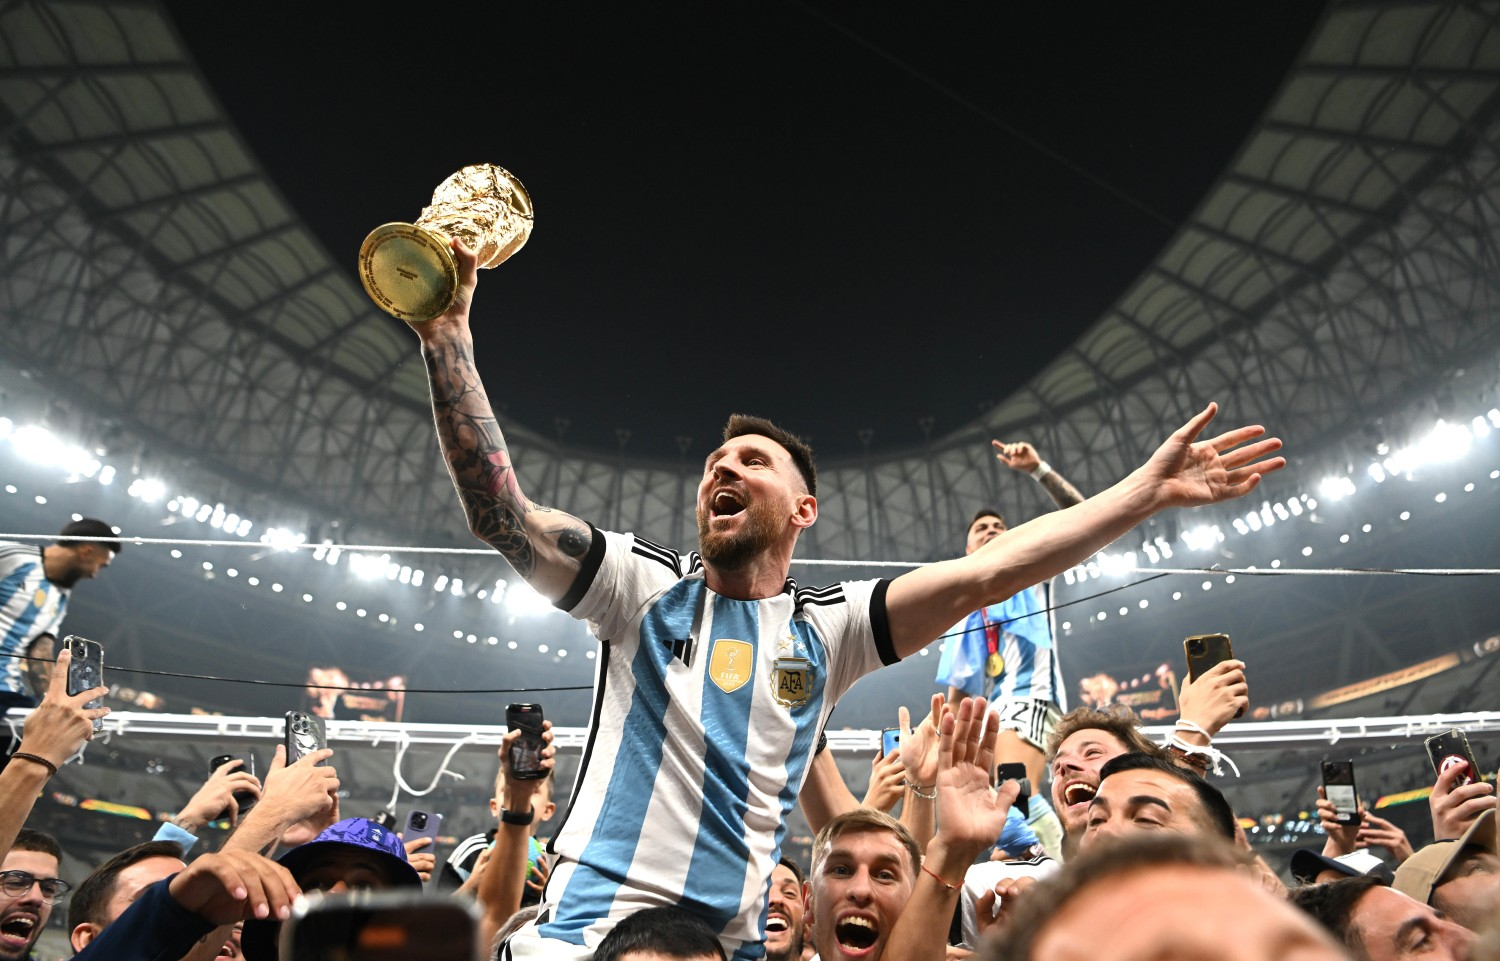

In [27]:
from IPython.display import Image
print(captioner2(file_name1))
display(Image(filename=file_name1))

# Photo 3



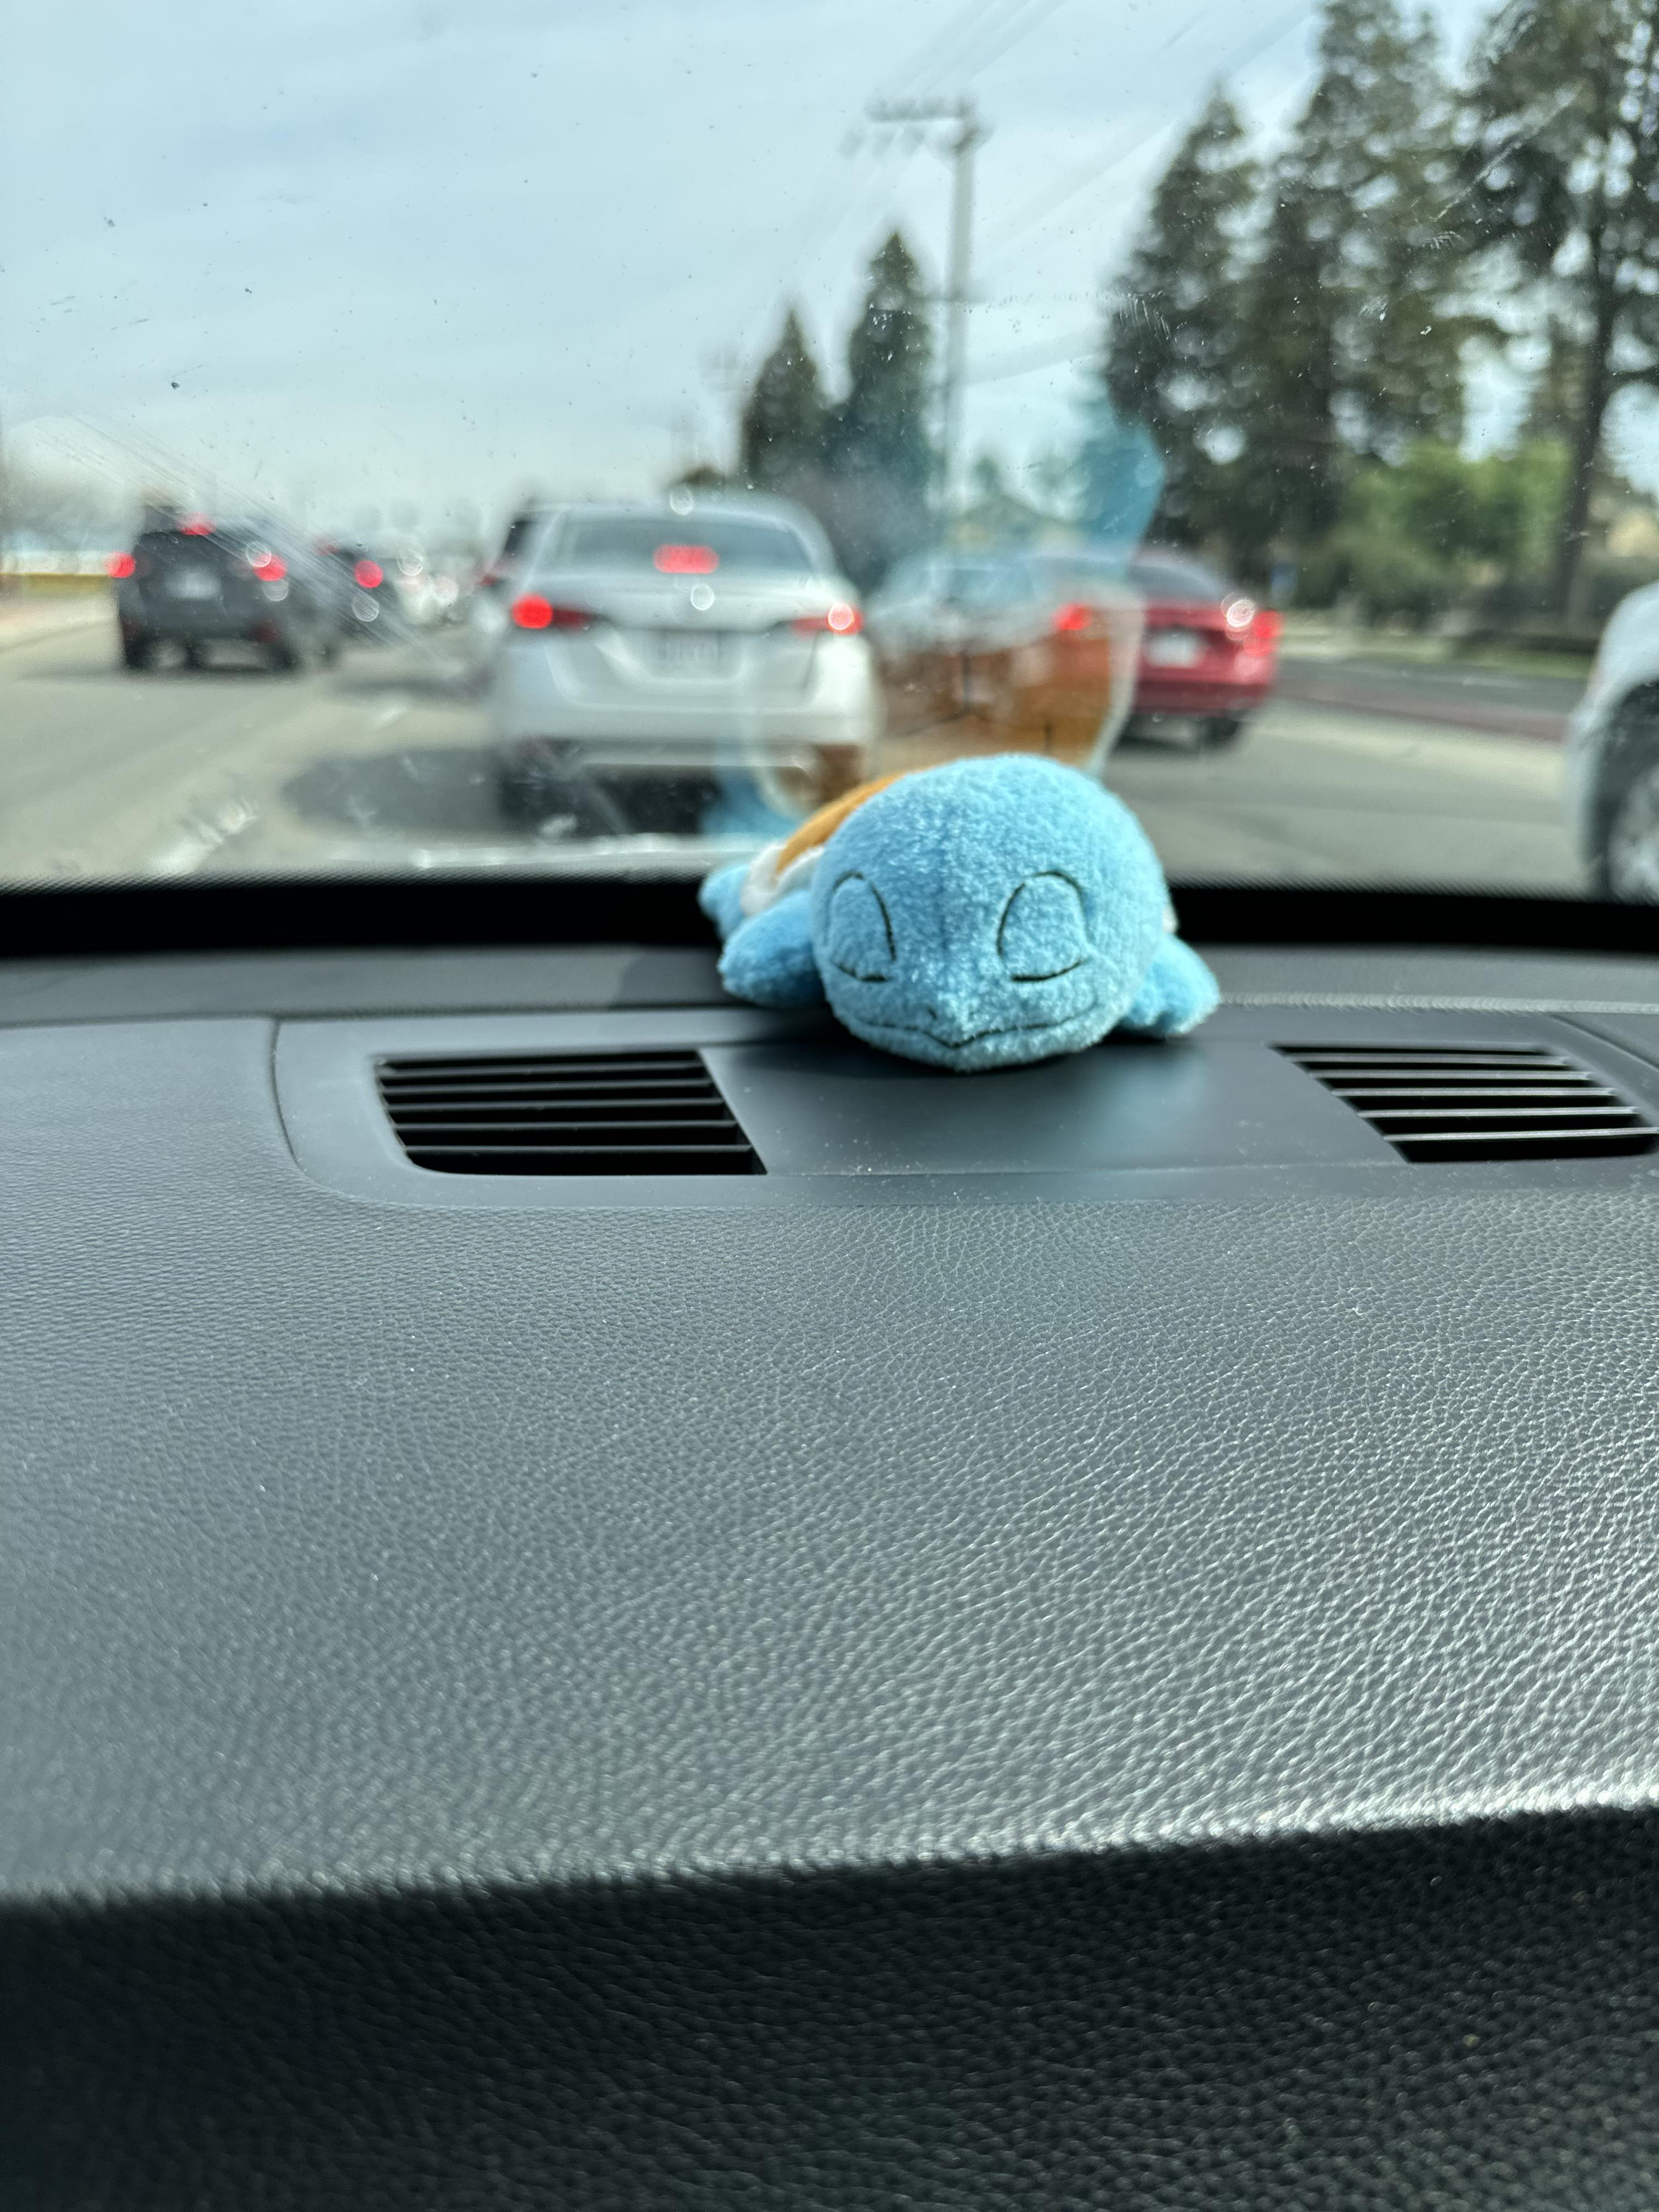

[{'generated_text': 'a stuffed animal sitting on the dashboard of a car'}]

In [77]:
from IPython.display import Image
display(Image(filename=file_name3))
captioner3(file_name3)

captioner 3 seems to have a lot of trouble running in a reasonable amount of time. This issue seems to be independent of the actual file itself.